In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("House_prediction.csv")

In [3]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
cities = list(set(data['city']))

In [5]:
cities

['Rio de Janeiro', 'Campinas', 'São Paulo', 'Porto Alegre', 'Belo Horizonte']

In [6]:
# Separating data into cities
data1 = data.loc[data['city']=='Belo Horizonte'] 
data2 = data.loc[data['city']=='Campinas'] 
data3 = data.loc[data['city']=='Porto Alegre'] 
data4 = data.loc[data['city']=='Rio de Janeiro'] 
data5 = data.loc[data['city']=='São Paulo'] 

area


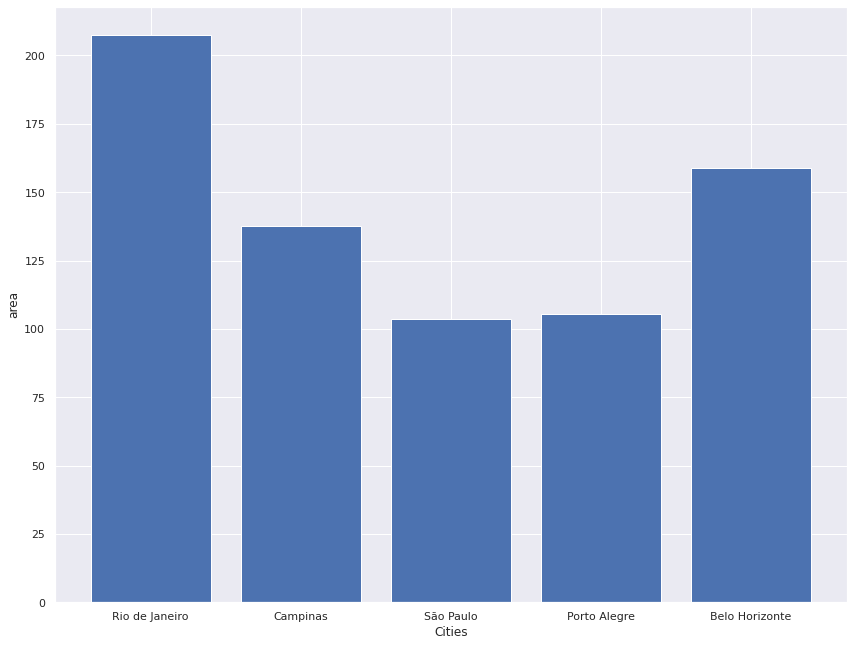

rooms


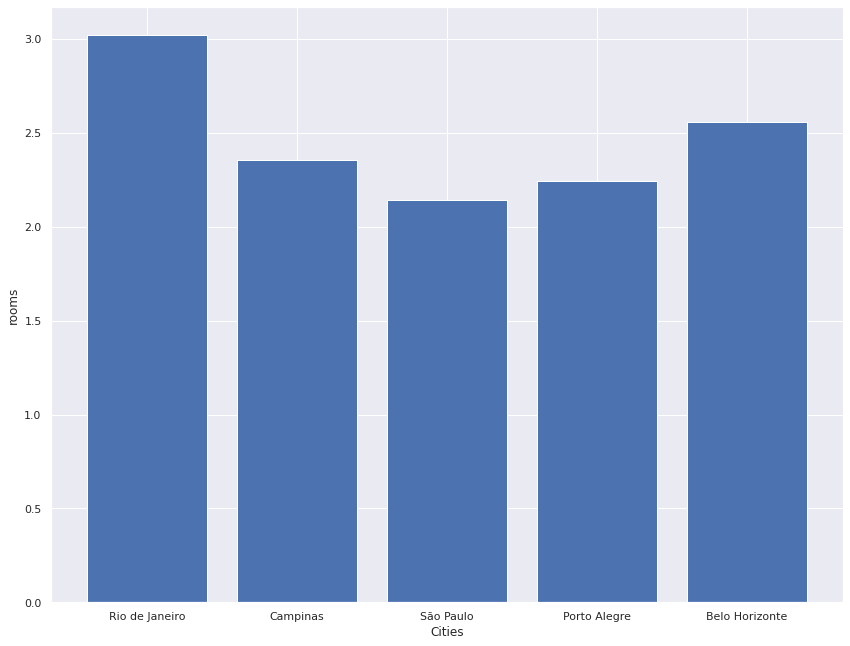

bathroom


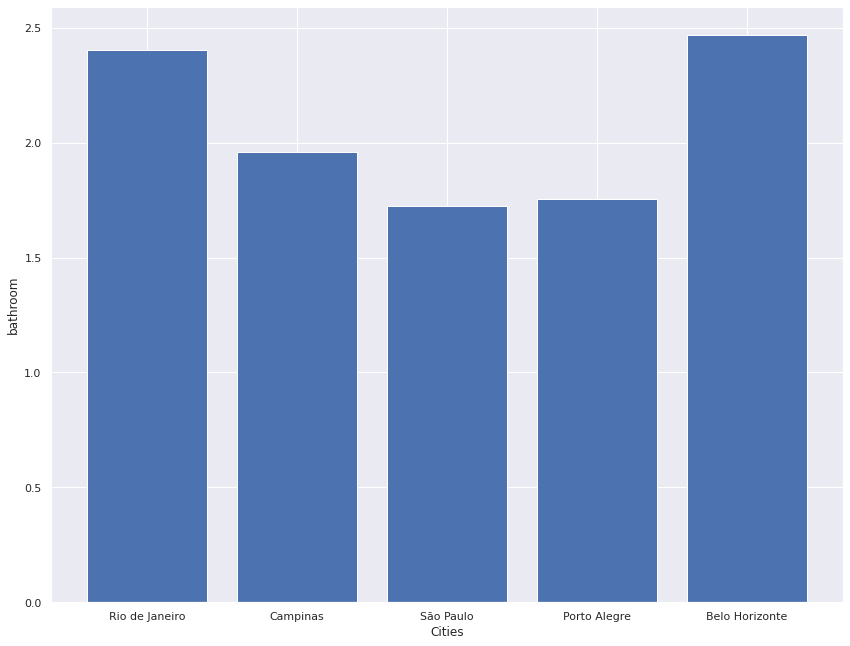

parking spaces


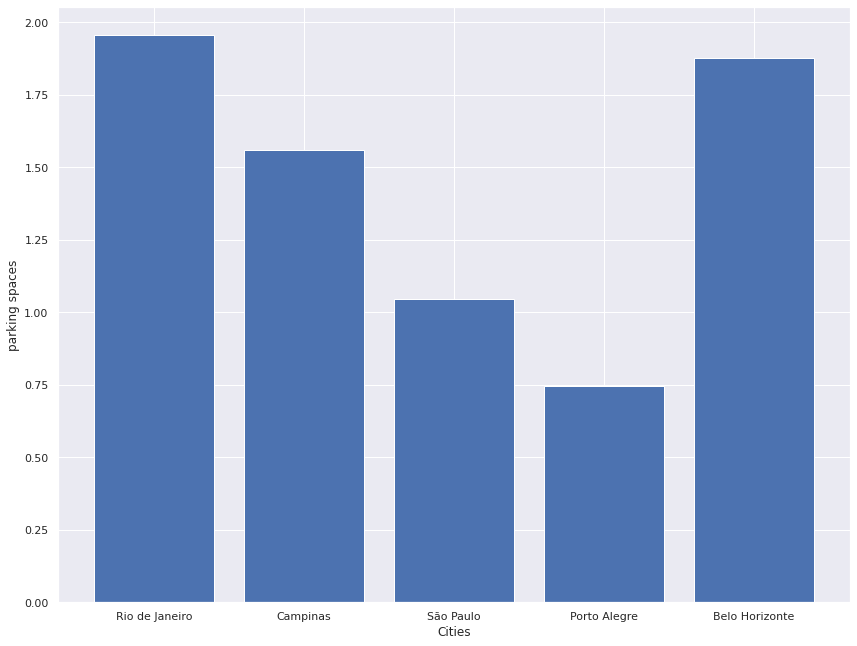

hoa (R$)


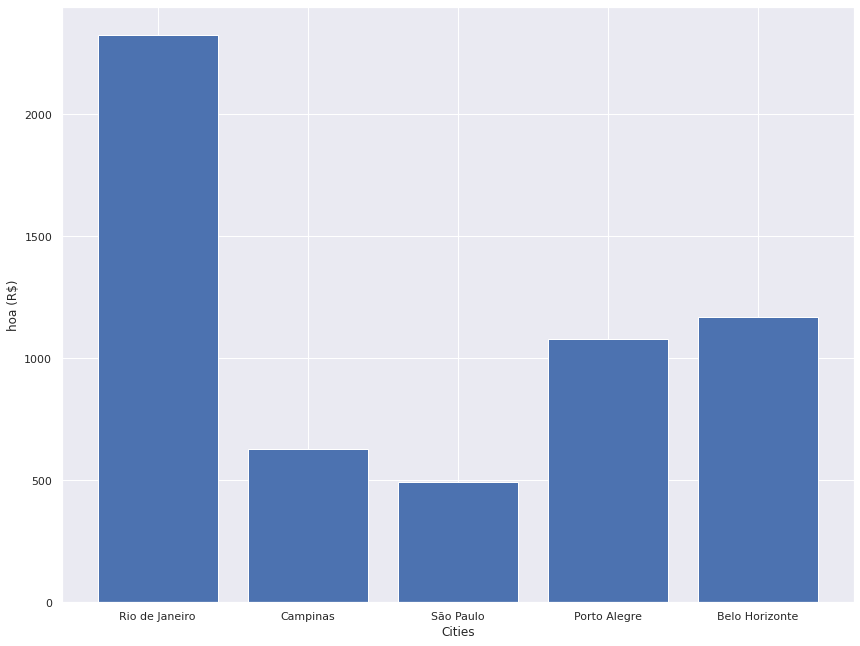

rent amount (R$)


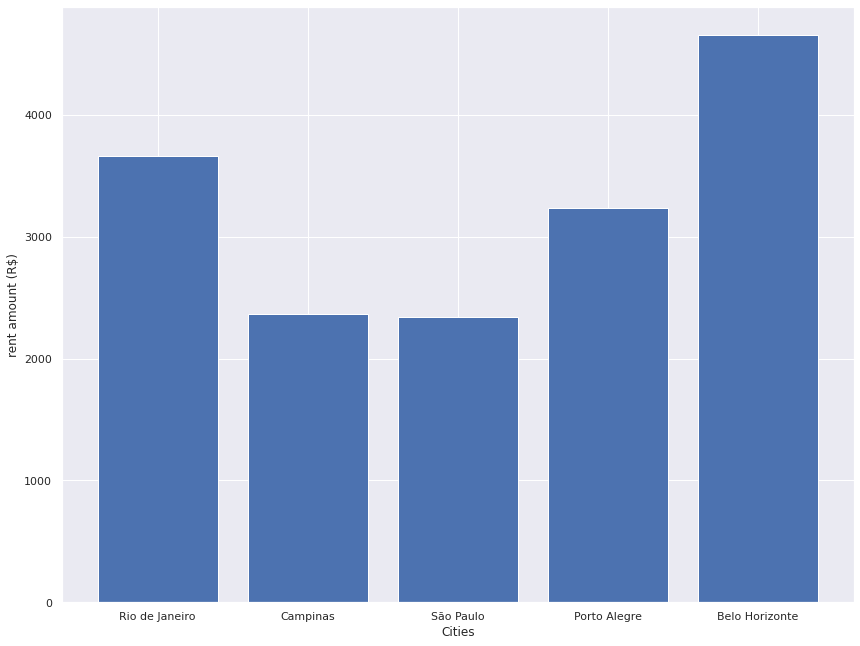

property tax (R$)


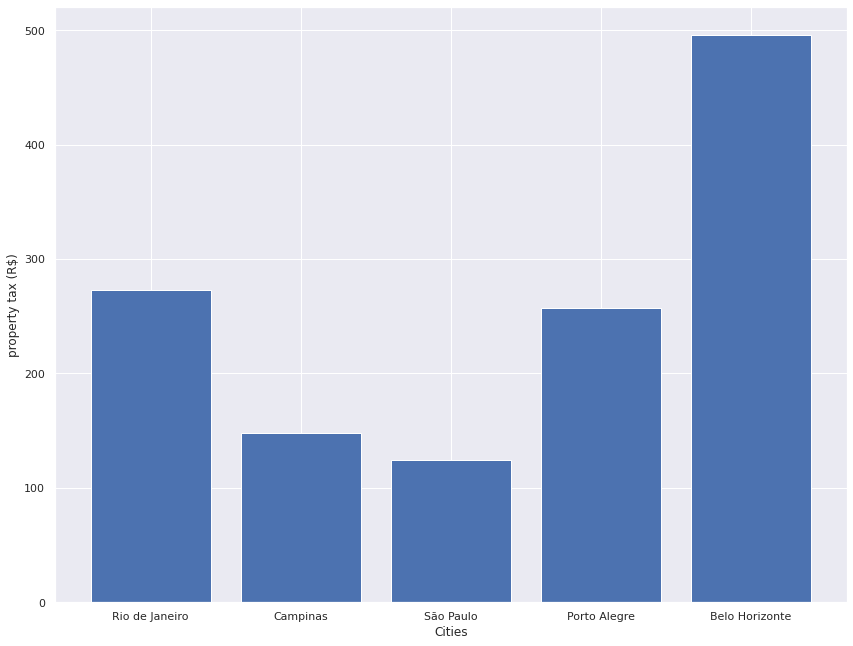

fire insurance (R$)


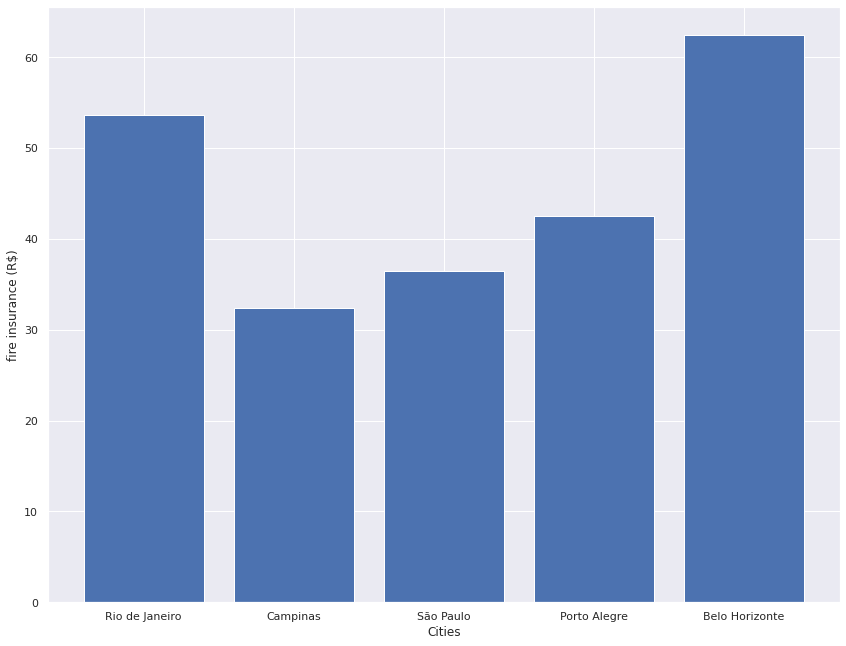

total (R$)


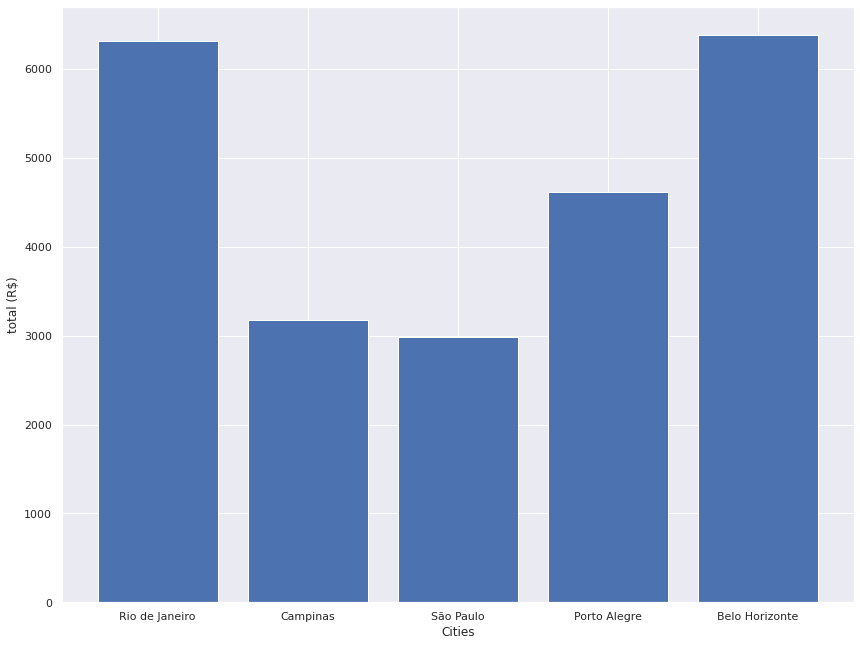

In [30]:
# Plotting all graphs
# Floor is skipped for it is not int
import seaborn as sn
sn.set(rc={'figure.figsize':(11,8.27)})
for col in data.columns:
        if(col=='city'):
            continue
        if(col=='animal'):
            continue
        if(col=='furniture'):
            continue
        if(col=='floor'):
            continue    
        fig = plt.figure()
        print(col)
        ax = fig.add_axes([0,0,1,1])
        ax.bar(cities,[data1[col].mean(0),data2[col].mean(0),data3[col].mean(0),data4[col].mean(0),data5[col].mean(0)])
        ax.set_ylabel(col)
        ax.set_xlabel('Cities')
        plt.show()
        if(col=='total (R$)'):
            break
    

In [32]:
corrMatrix1 = data[['hoa (R$)','area','rooms','parking spaces','bathroom']].corr()
corrMatrix2 = data[['property tax (R$)','area','rooms','parking spaces','bathroom']].corr()
corrMatrix3 = data[['rent amount (R$)','area','rooms','parking spaces','bathroom']].corr()

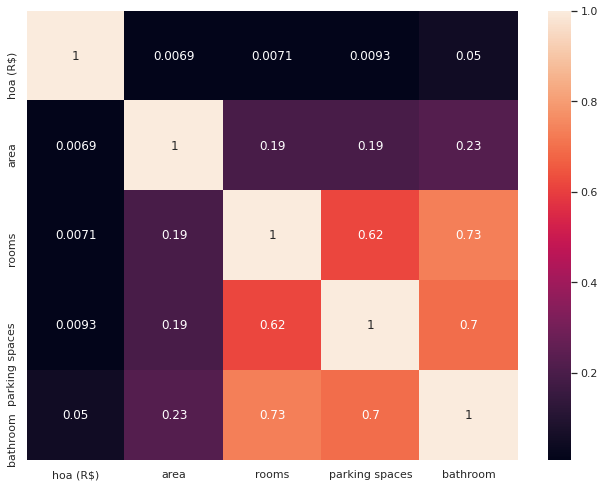

In [33]:
sn.heatmap(corrMatrix1, annot=True)
plt.show()

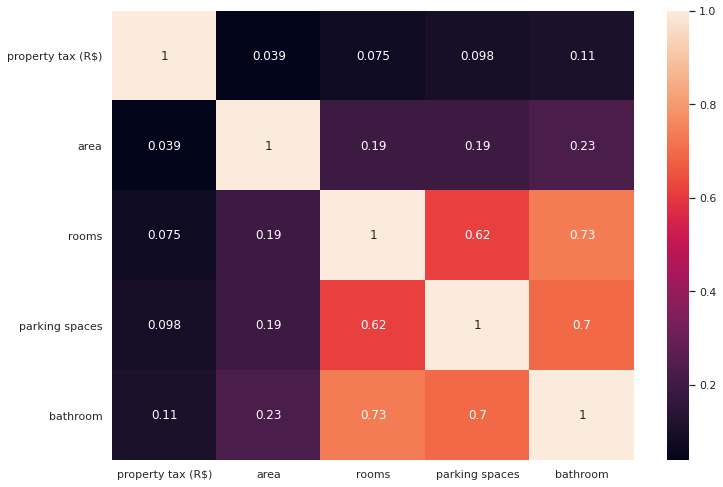

In [25]:
sn.heatmap(corrMatrix2, annot=True)
plt.show()

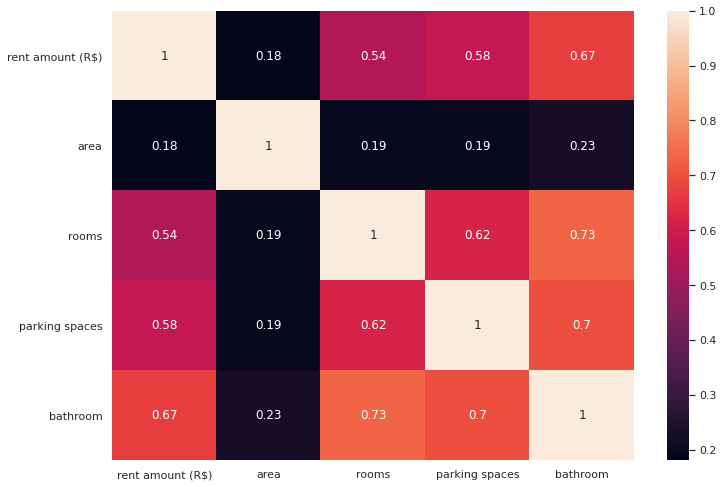

In [26]:
sn.heatmap(corrMatrix3, annot=True)
plt.show()

In [28]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [43]:
Y = data['rent amount (R$)']
X = data[['area','rooms','property tax (R$)','hoa (R$)','parking spaces','bathroom','fire insurance (R$)']]
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=10000)
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = clf.predict(X_test)

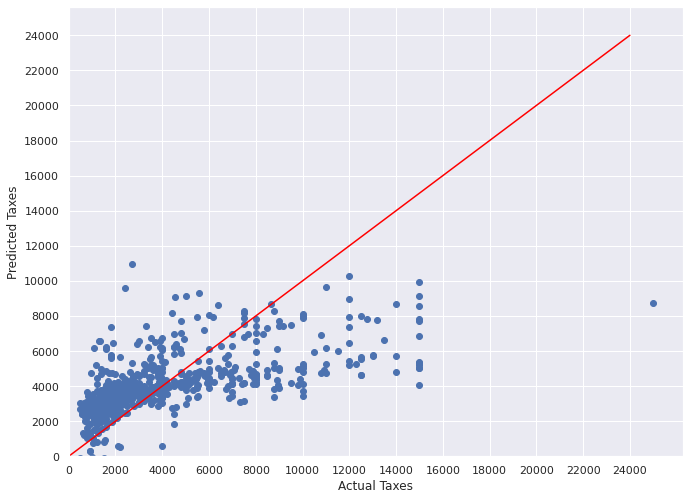

In [45]:
plt.scatter(list(y_test),list( y_pred))
plt.xlabel("Actual Taxes")
plt.ylabel("Predicted Taxes")
plt.xticks(np.arange(0, int(max(list(y_test)))+500,2000))
plt.yticks(np.arange(0, int(max(list(y_test)))+500,2000))
x = np.arange(0, int(max(list(y_test)))+500,2000)
plt.plot(x,x,color='red')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()